In [4]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')

In [44]:
n_blobs: int = 2
def plot_n_blobs(n_blobs: int, ax) -> None:
    X, y = make_blobs(n_samples=100, n_features=2, centers=n_blobs, random_state=42)
    clf = CalibratedClassifierCV(LinearSVC(dual=False))
    clf.fit(X=X, y=y)
    probs = clf.predict_proba(X=X)
    sns.histplot(probs.reshape(-1,), stat='proportion', kde=True, ax=ax, binwidth=0.04)
    ax.set_xlim(-0.03, 1.03)
    ax.set_ylim(0.00, 0.4)
    ax.set_title(f"n_classes={n_blobs}")
    return None

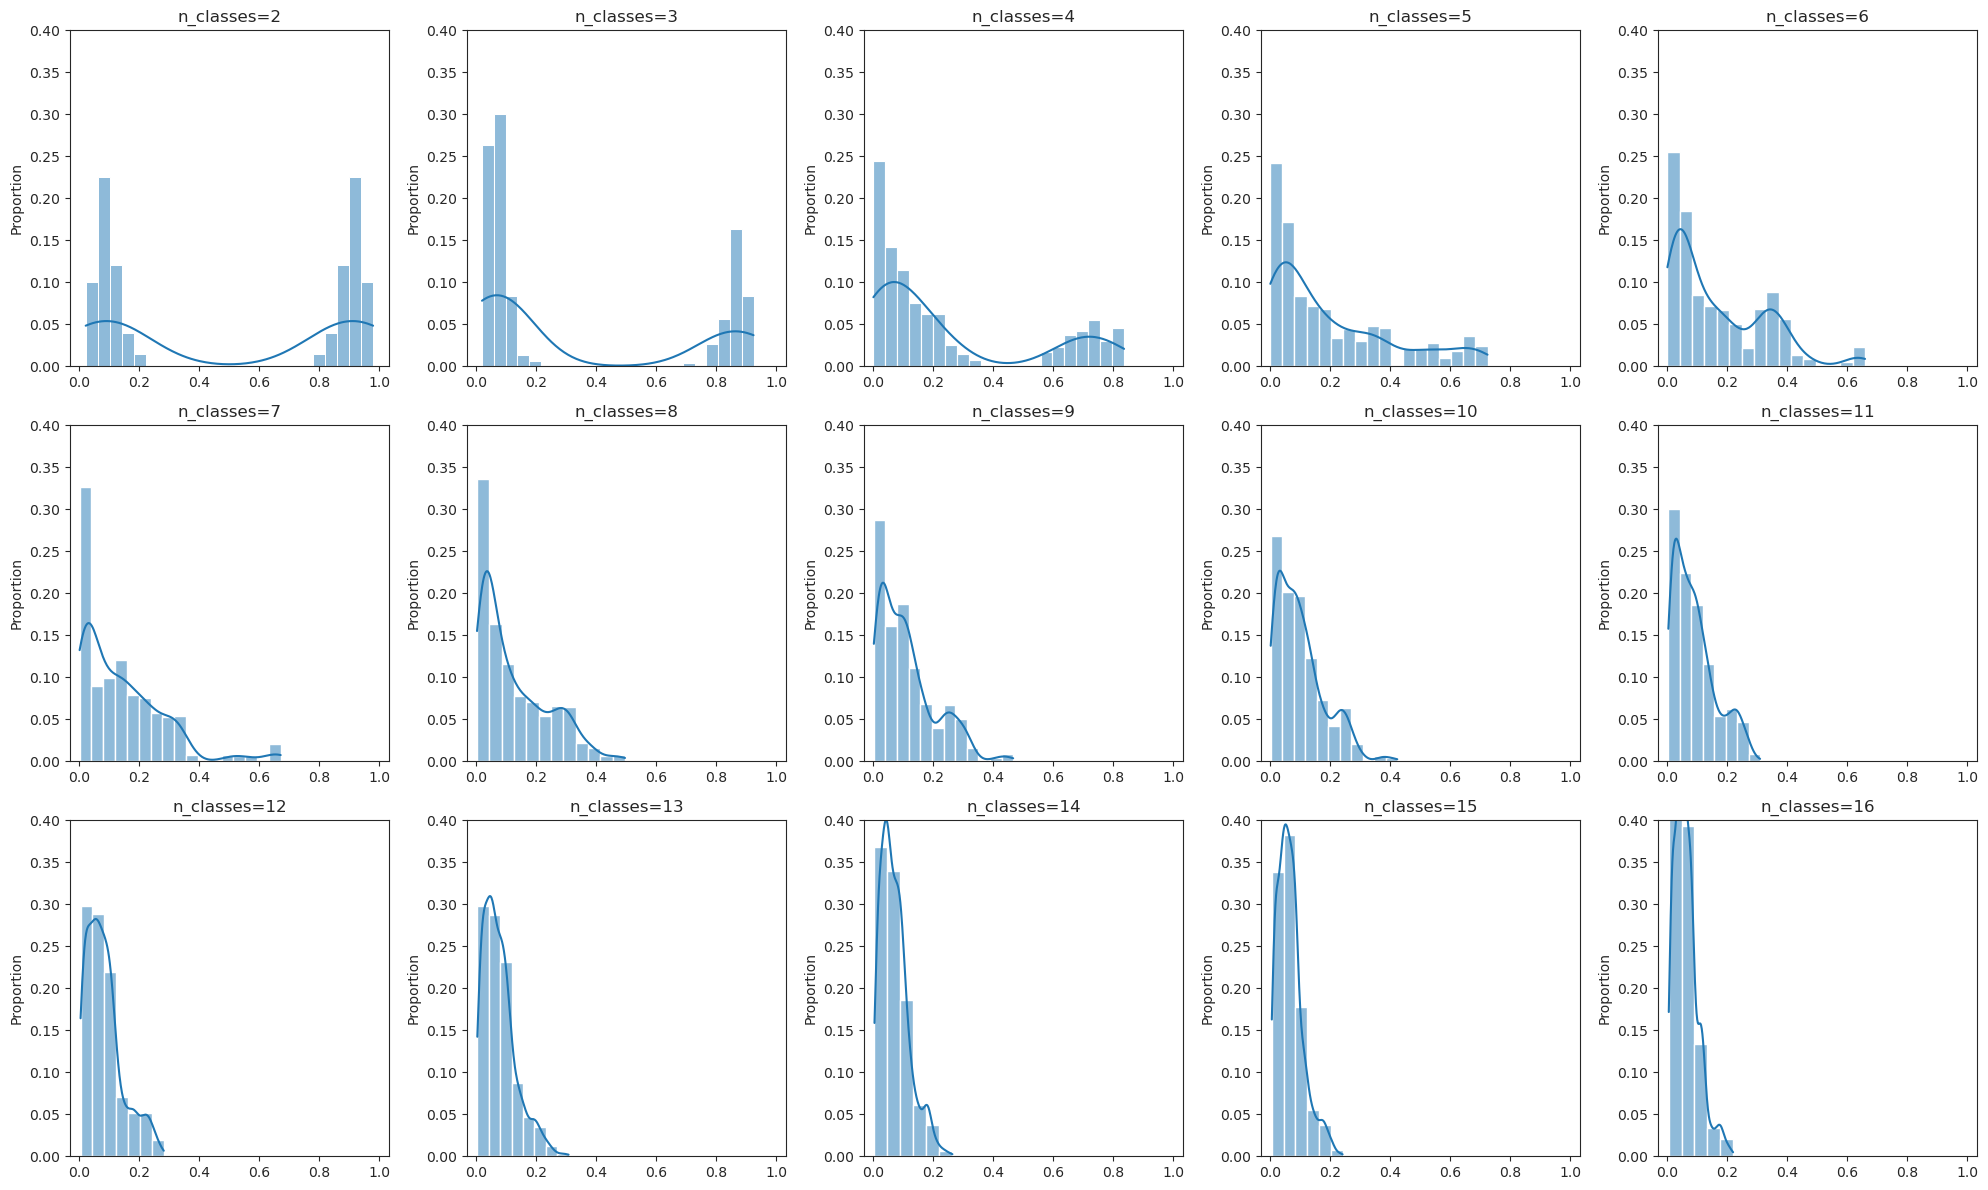

In [45]:
fig, ax = plt.subplots(3,5,figsize=(20,12))
ax = ax.flatten()
for n_blobs in range(2, 17):
    plot_n_blobs(n_blobs, ax[n_blobs-2])
plt.tight_layout()
plt.savefig('n_blobs_vs_probs.jpg', dpi=1500, transparent=True)